### 0. Linear Regression 들어가기 전에 ML Basic 설명함

1. Types of supervised learning<br/>
    1) Predicting final exam score based on time spent - regression<br/>
    2) Pass/non-pass based on time spent - binary classification<br/>
    3) Letter grade (A, B, C, E and F) based on time spent - multi-label classification<br/><br/>

2. Types of unsupervised learning<br/>
    1) Clustering<br/><br/>

3. (시즌1-2 12-1월) 강화 학습(Reinforcement learning)은 이 다루는 문제 중에서 다음과 같이 되는 것을 다룬다. 어떤 환경을 탐색하는 에이전트가 현재의 상태를 인식하여 어떤 행동을 취한다. 그러면 그 에이전트는 환경으로부터 포상을 얻게 된다. 포상은 양수와 음수 둘 다 가능하다. 강화 학습의 알고리즘은 그 에이전트가 앞으로 누적될 포상을 최대화 하는 일련의 행동으로 정의되는 정책을 찾는 방법이다.


### 1. Single Variable Regression

In [2]:
import tensorflow as tf
import numpy as np

In [3]:
num_points = 1000 # 1000개
vectors_set = []

In [6]:
#0. 데이터 생성
for i in range(num_points):
    x1 = np.random.normal(0.0, 0.5) # x1: mu = 0.0, sigma = 0.5
    y1 = x1*0.1 + 0.3 + np.random.normal(0.0, 0.03) # y1: x1*.0.1 + 0.3 + noise
    vectors_set.append([x1, y1])

x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]

In [27]:
#10까지만 출력
for i in range(10):
    print([x_data[i], y_data[i]])

[-0.6312299870370218, 0.17859428662144894]
[0.23541127081524124, 0.29461209131396665]
[0.09034514573324891, 0.31305865590164655]
[0.48365633452093454, 0.330602018912326]
[0.7199051140816035, 0.3722244527218981]
[-0.2884563809136166, 0.2800706266378547]
[0.3677720980089998, 0.3722143104744082]
[0.05353842452864675, 0.25373685747237923]
[0.30430245272530015, 0.32924971020216826]
[0.6214756915467111, 0.34676600621308196]


<IPython.core.display.Javascript object>


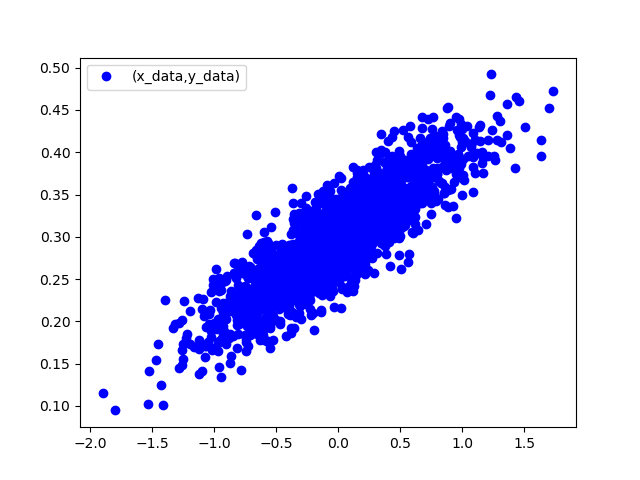

In [21]:
import matplotlib.pyplot as plt
%matplotlib nbagg

plt.plot(x_data, y_data, 'bo')
plt.show()
plt.legend(['(x_data,y_data)'])

#### 여기부터 강의 내용

In [388]:
#1. 변수 설정
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

In [389]:
#2. 가설 설정
hypothesis = x_data * W + b

In [390]:
#3. Cost Function
cost = tf.reduce_mean(tf.square(hypothesis - y_data))

In [391]:
#4. Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

In [392]:
#5. Launch the graph in a session.
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [393]:
#Fitting
for step in range(2001):
    sess.run(train)
    if step%200 == 0:
        print(step, sess.run(cost), sess.run(W), sess.run(b))

0 1.55407 [ 2.11706972] [-0.38807356]
200 0.132117 [ 0.81364763] [ 0.29857448]
400 0.0174272 [ 0.35404688] [ 0.30482209]
600 0.0029901 [ 0.19092533] [ 0.30286467]
800 0.00117024 [ 0.13301151] [ 0.30209628]
1000 0.000940844 [ 0.11244981] [ 0.30182219]
1200 0.000911927 [ 0.10514952] [ 0.30172488]
1400 0.000908282 [ 0.10255763] [ 0.3016904]
1600 0.000907823 [ 0.10163739] [ 0.30167845]
1800 0.000907765 [ 0.10131064] [ 0.30167377]
2000 0.000907757 [ 0.10119465] [ 0.30167264]


#### using placeholder

In [385]:
import time as time

In [386]:
#시간 설정
start_time = time.time()

#1-1. 변수 설정
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

#1-2. placeholder 설정
X = tf.placeholder(tf.float32, shape=[None])
Y = tf.placeholder(tf.float32, shape=[None])

#2. hypothesis
hypothesis = X*W + b

#3. cost function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

#4. Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

#5. Launch the graph in a session
sess = tf.Session()
sess.run(tf.global_variables_initializer())

#Fit the line
for step in range(2001):
    new_cost, new_W, new_b, _ = sess.run([cost, W, b, train], feed_dict={X: x_data, Y: y_data})
    if step%200 == 0:
        print(step, new_cost, new_W, new_b)            
        
end_time = time.time()
print('\n')
print('경과 시간: ', end_time - start_time, " 초")

0 0.184675 [ 0.93561465] [ 0.26550269]
200 0.0237795 [ 0.39719418] [ 0.30478752]
400 0.00379076 [ 0.20624192] [ 0.30305818]
600 0.00127117 [ 0.13844952] [ 0.30216861]
800 0.000953566 [ 0.11438047] [ 0.30184793]
1000 0.000913531 [ 0.10583494] [ 0.30173403]
1200 0.000908484 [ 0.10280096] [ 0.30169368]
1400 0.000907848 [ 0.10172376] [ 0.30167934]
1600 0.000907767 [ 0.10134133] [ 0.3016741]
1800 0.000907758 [ 0.10120557] [ 0.30167273]
2000 0.000907756 [ 0.10115735] [ 0.30167225]


경과 시간:  2.8803961277008057  초


위 결과에 따라서 W = 1.000, b = 0.3 추정

In [387]:
%matplotlib inline

Instructions for updating:
Use `tf.global_variables_initializer` instead.
0 [-0.57345152] [ 0.29929996]
0 0.119285


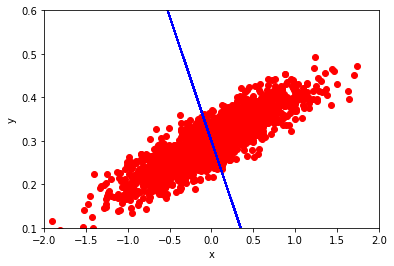

1 [-0.39774618] [ 0.2993142]
1 0.0655897


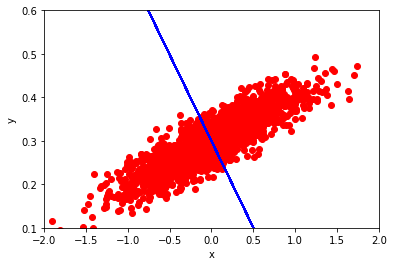

2 [-0.26785186] [ 0.29932439]
2 0.0362438


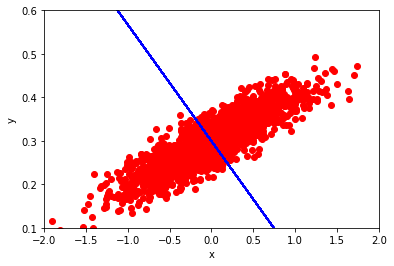

3 [-0.17182443] [ 0.29933193]
3 0.0202055


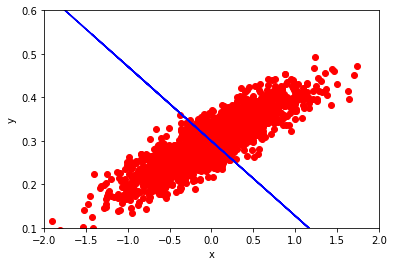

4 [-0.10083393] [ 0.29933751]
4 0.0114401


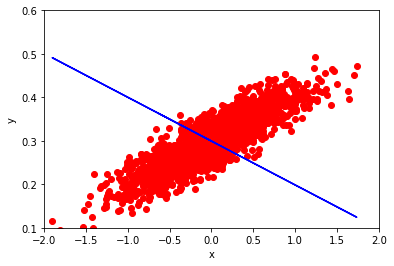

5 [-0.04835254] [ 0.29934165]
5 0.00664965


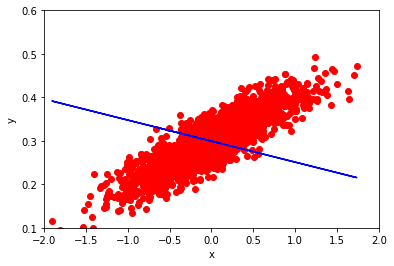

6 [-0.00955445] [ 0.29934469]
6 0.00403154


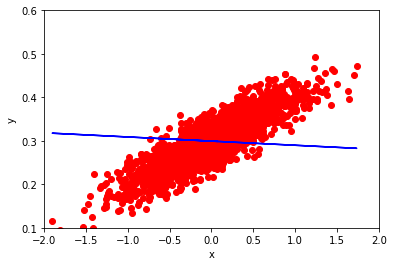

7 [ 0.01912796] [ 0.29934692]
7 0.00260067


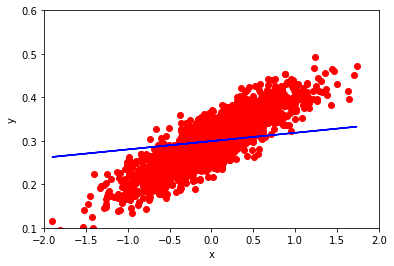

8 [ 0.04033209] [ 0.29934859]
8 0.00181867


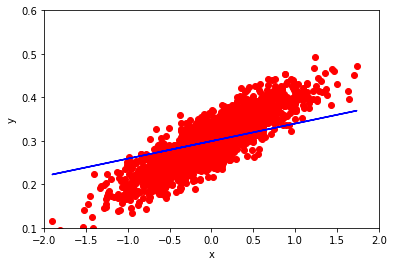

9 [ 0.05600774] [ 0.29934984]
9 0.00139128


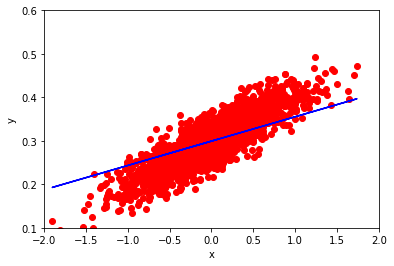

In [92]:
#시각화
#1. 변수
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

#2. 가설
y = x_data * W + b

#3. cost fucntion
cost = tf.reduce_mean(tf.square(y_data - y))

#4. gradient descent
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(cost)

#5. Launch
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

for step in range(10):
    sess.run(train)
    print(step, sess.run(W), sess.run(b))
    print(step, sess.run(cost))
    
    #그래픽
    plt.plot(x_data, y_data, 'ro')
    plt.plot(x_data, sess.run(W) * x_data + sess.run(b), 'b')
    plt.xlabel('x')
    plt.xlim(-2, 2)
    plt.ylim(0.1, 0.6)
    plt.ylabel('y')
    plt.legend()
    plt.show()

### 2. Gradient Descent 구현

#### 1) W의 변화에 따른 Cost 값 구하기

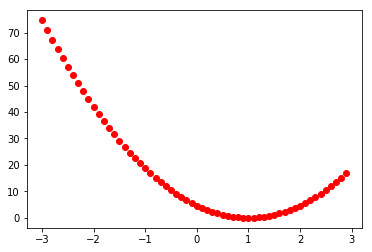

In [277]:
import tensorflow as tf
import matplotlib.pyplot as plt

#1. 변수
X = [1,2,3]
Y = [1,2,3]

W = tf.placeholder(tf.float32)

#2. Hypothesis for linear model X*W
hypothesis = X * W

#3. Cost
cost = tf.reduce_mean(tf.square(hypothesis - Y))

#4. Initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

#5. W 값이 변함에 따라서 cost 값의 변화를 그린다.
W_val = []
cost_val = []

for i in range(-30, 30):
    feed_W = i * 0.1
    curr_cost, curr_W = sess.run([cost, W], feed_dict={W: feed_W})
    W_val.append(curr_W)
    cost_val.append(curr_cost)
    
#Show the cost function
plt.plot(W_val, cost_val, 'ro')
plt.show()

#### 2) Gradient descent 직접 구현

In [281]:
#1. 변수 및 초기 값 설정
x_data = [1,2,3]
y_data = [1,2,3]

W = tf.Variable(tf.random_normal([1]), name='weight')
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

#2. 가설
hypothesis = X*W

#3. cost funciton
cost = tf.reduce_sum(tf.square(hypothesis - Y))

<img src="./photo/gradient.png">

In [282]:
#4. Minimize: Gradient Descent using derivative: W -= Learning rate * derivative
learning_rate = 0.1
gradient = tf.reduce_mean((W*X - Y) * X)
descent = W - learning_rate * gradient
update = W.assign(descent)

#5. Launch
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(21):
    sess.run(update, feed_dict={X: x_data, Y: y_data})
    print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run(W))

0 14.6139 [-0.0216884]
1 4.15683 [ 0.45509949]
2 1.18239 [ 0.70938635]
3 0.336324 [ 0.84500605]
4 0.0956653 [ 0.91733658]
5 0.0272115 [ 0.95591283]
6 0.00774016 [ 0.97648686]
7 0.00220164 [ 0.98745966]
8 0.000626246 [ 0.99331182]
9 0.000178134 [ 0.99643296]
10 5.06685e-05 [ 0.9980976]
11 1.44108e-05 [ 0.99898541]
12 4.09962e-06 [ 0.99945885]
13 1.16631e-06 [ 0.99971139]
14 3.31479e-07 [ 0.9998461]
15 9.4339e-08 [ 0.99991792]
16 2.67654e-08 [ 0.99995625]
17 7.64294e-09 [ 0.99997663]
18 2.17706e-09 [ 0.99998754]
19 6.10459e-10 [ 0.99999338]
20 1.71884e-10 [ 0.99999648]


#### 선택) Gradient Descent 조정 가능 

In [283]:
# Lab 3 Minimizing Cost
# This is optional
import tensorflow as tf
tf.set_random_seed(777)  # for reproducibility

# tf Graph Input
X = [1, 2, 3]
Y = [1, 2, 3]

# Set wrong model weights
W = tf.Variable(5.)

# 2. 가설 Linear model
hypothesis = X * W

# Manual gradient
gradient = tf.reduce_mean((W * X - Y) * X) * 2

# 3. Cost cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# 4. Minimize: Gradient Descent Magic
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# Get gradients
gvs = optimizer.compute_gradients(cost, [W])
# Optional: modify gradient if necessary
# gvs = [(tf.clip_by_value(grad, -1., 1.), var) for grad, var in gvs]
# Apply gradients
apply_gradients = optimizer.apply_gradients(gvs)

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(100):
    print(step, sess.run([gradient, W, gvs]))
    sess.run(apply_gradients)
    # Same as sess.run(train)

0 [37.333332, 5.0, [(37.333336, 5.0)]]
1 [33.848888, 4.6266665, [(33.848888, 4.6266665)]]
2 [30.689657, 4.2881775, [(30.689657, 4.2881775)]]
3 [27.825287, 3.9812808, [(27.825287, 3.9812808)]]
4 [25.228262, 3.703028, [(25.228264, 3.703028)]]
5 [22.873621, 3.4507453, [(22.873623, 3.4507453)]]
6 [20.738752, 3.2220092, [(20.738752, 3.2220092)]]
7 [18.803137, 3.0146217, [(18.803137, 3.0146217)]]
8 [17.048176, 2.8265903, [(17.048176, 2.8265903)]]
9 [15.457013, 2.6561086, [(15.457014, 2.6561086)]]
10 [14.014359, 2.5015385, [(14.01436, 2.5015385)]]
11 [12.706352, 2.3613949, [(12.706352, 2.3613949)]]
12 [11.520427, 2.2343314, [(11.520427, 2.2343314)]]
13 [10.445186, 2.119127, [(10.445186, 2.119127)]]
14 [9.4703016, 2.0146751, [(9.4703016, 2.0146751)]]
15 [8.5864067, 1.9199722, [(8.5864067, 1.9199722)]]
16 [7.7850089, 1.8341081, [(7.7850089, 1.8341081)]]
17 [7.0584083, 1.756258, [(7.0584083, 1.756258)]]
18 [6.3996239, 1.685674, [(6.3996239, 1.685674)]]
19 [5.8023257, 1.6216778, [(5.8023257, 1.62

#### 참고) W를 구하는 방법 - 정규방정식

X * W = y

X = X_train, Y = Y_train<br/>
W = (b, W)

<a href="https://eli.thegreenplace.net/2014/derivation-of-the-normal-equation-for-linear-regression">링크</a>

In [380]:
#0. 데이터 생성
num_points = 1000 # 1000개
vectors_set = []

for i in range(num_points):
    x1 = np.random.normal(0.0, 0.5) # x1: mu = 0.0, sigma = 0.5
    y1 = x1*0.1 + 0.3 + np.random.normal(0.0, 0.03) # y1: x1*.0.1 + 0.3 + noise
    vectors_set.append([x1, y1])

x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]

In [381]:
x = np.array(x_data)[np.newaxis].T

In [383]:
#input_data
start_time = time.time()

x = np.array(x_data)[np.newaxis].T
Y = np.array(y_data)[np.newaxis].T

x0shape = (1000, 1)
x0 = np.ones(x0shape)
X = np.concatenate([x0, x], axis=1)

#X는 column개수가 2개이다. 왜냐하면 X*W + b에서 b에 곱해지는 값은 1
print("X Shape: ", np.shape(X))
print("Y Shape: ", np.shape(Y))

XtX = np.matmul(X.T, X)
iXtX = np.linalg.inv(XtX)
iXtXXt = np.matmul(iXtX, X.T)
W = np.matmul(iXtXXt, Y)

print(W)

end_time = time.time()
print('\n')
print('경과 시간: ', end_time - start_time, " 초")

X Shape:  (1000, 2)
Y Shape:  (1000, 1)
[[ 0.30167126]
 [ 0.1011308 ]]


경과 시간:  0.1610724925994873  초


### 3. Multi variable linear regression

Simple linear regression과 비슷하게 하면 되나 데이터 다루는 데에 좀 더 신경써야 함

In [395]:
#1. 변수 설정
x_train = [[73, 93, 89, 96, 73],
           [80, 88, 91, 98, 66],
           [75, 93, 90, 100, 70]]
x_train = np.array((x_train)).T
y_train = [152, 185, 180, 196, 142]

#COLUMN 하나 더 추가해서 Transpose
y_train = np.array(y_train)[np.newaxis].T#

In [396]:
x_data = [[73., 80., 75.], [93., 88., 93.],
[89., 91., 90.], [96., 98., 100.], [73., 66., 70.]] 
y_data = [[152.], [185.], [180.], [196.], [142.]]

In [397]:
print(x_train, '\n', np.array(x_data))
print(y_train, '\n', np.array(y_data))

[[ 73  80  75]
 [ 93  88  93]
 [ 89  91  90]
 [ 96  98 100]
 [ 73  66  70]] 
 [[  73.   80.   75.]
 [  93.   88.   93.]
 [  89.   91.   90.]
 [  96.   98.  100.]
 [  73.   66.   70.]]
[[152]
 [185]
 [180]
 [196]
 [142]] 
 [[ 152.]
 [ 185.]
 [ 180.]
 [ 196.]
 [ 142.]]


In [398]:
X = tf.placeholder(tf.float32, shape=[None, 3], name='x_data')
Y = tf.placeholder(tf.float32, shape=[None, 1], name='y_data')

W = tf.Variable(tf.random_normal([3, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

#2. 가설 설정
hypothesis = tf.matmul(X, W) + b

#3. cost
cost = tf.reduce_mean(tf.square(hypothesis - Y))

#4. gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.000001)
train = optimizer.minimize(cost)

#5. Launch
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2001): 
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
    if step % 500 == 0:
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)

0 Cost:  159026.0 
Prediction:
 [[-198.65325928]
 [-243.13491821]
 [-237.15530396]
 [-259.60757446]
 [-185.52664185]]
500 Cost:  6.27118 
Prediction:
 [[ 155.12924194]
 [ 182.17654419]
 [ 181.86386108]
 [ 196.69941711]
 [ 138.89698792]]
1000 Cost:  6.10862 
Prediction:
 [[ 155.08140564]
 [ 182.20918274]
 [ 181.84909058]
 [ 196.68890381]
 [ 138.93966675]]
1500 Cost:  5.95049 
Prediction:
 [[ 155.03439331]
 [ 182.24153137]
 [ 181.83473206]
 [ 196.67874146]
 [ 138.98191833]]
2000 Cost:  5.79648 
Prediction:
 [[ 154.98789978]
 [ 182.27337646]
 [ 181.82044983]
 [ 196.66862488]
 [ 139.02354431]]


#### 위 예제에서 학습률에 고민을 해봐야 한다.<br/>

학습률을 어떻게 할 것인가? <br/>
1) if learning rate is small, show small convergence.<br/>
2) if learning rate is big, H(W) may not decrease on every iteration.

- 0.0001 -> 0.001 -> 0.01 -> 0.1 -> 1 등으로 순차적으로 테스트해가면서 적합한 learning rate 지정해야 함

#### feature selection

이것 또한 매우 중요하고 향후 공부할 주제다.

housePrice = b + W1*frontage + W2*width 로 회귀 식을 세울 것인가?<br/> 
housePrice = b + W1' * Area(

### 4. 학습 이후 Prediction

In [368]:
print("Your score will be ", sess.run(hypothesis, feed_dict={X: [[100, 70, 101]]}))

Your score will be  [[ 167.5355072]]


### 5. File 이 매우 클 때

Queue Runner 사용

<img src="./photo/queuerunner.png">

#Queue Runner 스텝
#1. filename_queue 생성<br/>
filename_queue = tf.train.string_input_producer(['파일 이름1', '파일 이름2', ...],
                                               shuffle=False, name='filename_queue')
#2. reader(읽어오기) - 파일을 읽어온다.<br/>
reader = tf.TextLineReader()
key, value = reader.read(filename_queue)

#3. record_defaults - 어떻게 Parsing을 할 것인가.<br/>
record_defaults = [[0.],[0.],[0.],[0.]]
xy = tf.decode_csv(value, record_defaults=record_defaults)

<img src="./photo/queuerunner2.png">

<img src="./photo/queuerunner3.png">

#### 참고) Ridge 및 Lasso 및 ElasticNet Regression<br/>

<a href="https://brunch.co.kr/@itschloe1/11">설명 링크</a><br/>
<a href="https://github.com/nfmcclure/tensorflow_cookbook/tree/master/03_Linear_Regression">코드 링크</a>